In [1]:
import pandas as pd
import numpy as np
import pickle

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv('data/IRAhandle_tweets_1.csv')
df.shape

(381016, 15)

In [46]:
df.account_category.unique()

array(['RightTroll', 'NonEnglish', 'Fearmonger', 'LeftTroll', 'Unknown',
       'HashtagGamer', 'NewsFeed', 'Commercial'], dtype=object)

In [47]:
df = df[((df['account_category'] != 'NonEnglish') &
        (df['account_category'] != 'Commercial') &
        (df['account_category'] != 'Unknown'))]

In [48]:
df.account_category.unique()

array(['RightTroll', 'Fearmonger', 'LeftTroll', 'HashtagGamer',
       'NewsFeed'], dtype=object)

In [49]:
df.columns

Index(['external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'harvested_date', 'following', 'followers', 'updates',
       'post_type', 'account_type', 'new_june_2018', 'retweet',
       'account_category'],
      dtype='object')

In [50]:
df.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll


In [51]:
df['date'] = df['publish_date'].apply(pd.to_datetime)

In [52]:
df.drop(['external_author_id', 'publish_date', 'harvested_date', 'new_june_2018',
         'account_type', 'post_type'], axis=1, inplace=True)

In [21]:
df[pd.DatetimeIndex(df.date).year==2016]

,author,content,region,language,following,followers,updates,retweet,account_category,date
5161,4EVER_SUSAN,but that dont say none of syrian refugees are ...,United States,English,75,55,48,0,RightTroll,2016-03-22 18:17:00
5162,4EVER_SUSAN,#IslamKills #tousensemble #prayforbrussels #Br...,United States,English,75,55,49,0,RightTroll,2016-03-22 18:18:00
5163,4EVER_SUSAN,#IslamKills Thoughts and prayers are with all ...,United States,English,75,55,51,0,RightTroll,2016-03-22 18:20:00
5164,4EVER_SUSAN,#Brussels #IslamKills Nous sommes de tout cœur...,United States,French,75,55,50,0,RightTroll,2016-03-22 18:20:00
5165,4EVER_SUSAN,"Refugees are not welcome, that my view! #Islam...",United States,English,75,55,52,0,RightTroll,2016-03-22 18:21:00
5166,4EVER_SUSAN,"#Brussels We may not be at war with Islam, but...",United States,English,75,55,53,0,RightTroll,2016-03-22 18:22:00
5167,4EVER_SUSAN,#IslamKills These people need to stay out of A...,United States,English,75,55,54,0,RightTroll,2016-03-22 18:24:00
5168,4EVER_SUSAN,"That's it!Not complicated at all. #IslamKills""",United States,English,75,55,55,0,RightTroll,2016-03-22 18:25:00
5169,4EVER_SUSAN,#Brussels #IslamKills Keep Canada White,United States,English,75,55,57,0,RightTroll,2016-03-22 18:26:00
5170,4EVER_SUSAN,#IslamKills Why do we destroy ourselves I don'...,United States,English,75,55,56,0,RightTroll,2016-03-22 18:26:00


In [55]:
datetime(2015, 10, 1)

datetime.datetime(2015, 10, 1, 0, 0)

In [65]:
df = df[pd.DatetimeIndex(df.date) > datetime(2015, 6, 18)]

In [67]:
df.head()

,author,content,region,language,following,followers,updates,retweet,account_category,date
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,1052,9636,253,0,RightTroll,2017-10-01 19:58:00
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,1054,9637,254,0,RightTroll,2017-10-01 22:43:00
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,1054,9637,255,1,RightTroll,2017-10-01 22:50:00
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,1062,9642,256,0,RightTroll,2017-10-01 23:52:00
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,1050,9645,246,1,RightTroll,2017-10-01 02:13:00


In [74]:
df['week'] = pd.DatetimeIndex(df.date).week + (pd.DatetimeIndex(df.date).year-2015)*52

In [76]:
df.head()

,author,content,region,language,following,followers,updates,retweet,account_category,date,week
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,1052,9636,253,0,RightTroll,2017-10-01 19:58:00,143
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,1054,9637,254,0,RightTroll,2017-10-01 22:43:00,143
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,1054,9637,255,1,RightTroll,2017-10-01 22:50:00,143
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,1062,9642,256,0,RightTroll,2017-10-01 23:52:00,143
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,1050,9645,246,1,RightTroll,2017-10-01 02:13:00,143


In [77]:
df['hour'] = pd.DatetimeIndex(df.date).hour

In [78]:
df['day'] = pd.DatetimeIndex(df.date).weekday

In [79]:
df['date'] = pd.DatetimeIndex(df.date).date

In [80]:
df.head()

,author,content,region,language,following,followers,updates,retweet,account_category,date,week,hour,day
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,1052,9636,253,0,RightTroll,2017-10-01,143,19,6
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,1054,9637,254,0,RightTroll,2017-10-01,143,22,6
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,1054,9637,255,1,RightTroll,2017-10-01,143,22,6
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,1062,9642,256,0,RightTroll,2017-10-01,143,23,6
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,1050,9645,246,1,RightTroll,2017-10-01,143,2,6


In [142]:
hour_tweets = df.groupby('hour').content.count().reset_index()

In [143]:
day_tweets = df.groupby('day').content.count().reset_index()

In [144]:
date_tweets = df.groupby('date').content.count().reset_index()

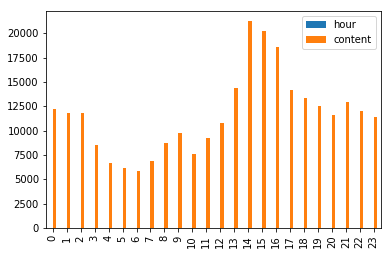

In [145]:
hour_tweets.plot(kind='bar')

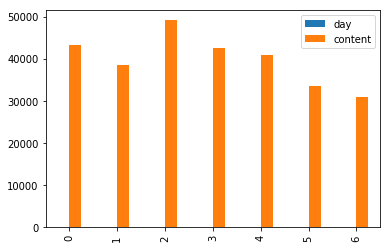

In [146]:
day_tweets.plot(kind='bar')

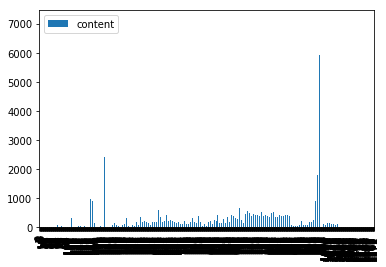

In [147]:
date_tweets.plot(kind='bar')

In [148]:
mst_hours = pd.Series([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2])
est_hours = pd.Series([19,20,21,22,23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
mst = pd.DataFrame(mst_hours)
mst.columns = ['hour']
mst['MST'] = hour_tweets.content
est = pd.DataFrame(est_hours)
est.columns = ['hour']
est['EST'] = hour_tweets.content

In [149]:
test = pd.merge(mst, est, on='hour')

In [153]:
test.head(10)

,hour,MST,EST
0,3,12248,8766
1,4,11810,9727
2,5,11814,7641
3,6,8568,9233
4,7,6700,10740
5,8,6124,14424
6,9,5847,21271
7,10,6836,20290
8,11,8766,18585
9,12,9727,14154


In [154]:
hour_tweets.head(10)

,hour,content
0,0,12248
1,1,11810
2,2,11814
3,3,8568
4,4,6700
5,5,6124
6,6,5847
7,7,6836
8,8,8766
9,9,9727


In [24]:
duplicates = df[df.duplicated(subset='content', keep=False)]

In [26]:
duplicates.sort_values('content', inplace=True)

/Users/bradpanzarella/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
duplicates.head()

,author,content,region,language,following,followers,updates,retweet,account_category,date,hour,day
108801,AMELIEBALDWIN,!@aka55 @AshleySteel The Bible foretells a fut...,United States,English,2353,2687,23511,1,RightTroll,2016-12-28,10,2
110069,AMELIEBALDWIN,!@aka55 @AshleySteel The Bible foretells a fut...,United States,English,2365,2599,20913,1,RightTroll,2016-12-08,12,3
111672,AMELIEBALDWIN,!@aka55 @AshleySteel The Bible foretells a fut...,United States,English,2325,2739,29780,1,RightTroll,2017-02-20,19,0
97412,AMELIEBALDWIN,!@aka55 @AshleySteel The Bible foretells a fut...,United States,English,2340,2724,27118,1,RightTroll,2017-01-28,22,5
95627,AMELIEBALDWIN,!@aka55 @AshleySteel The Bible foretells a fut...,United States,English,2346,2740,25206,1,RightTroll,2017-01-12,6,3


In [31]:
c = 0
for tweet in duplicates.content:
    if c < 100:
        print(tweet)
    else:
        break
    c+=1

!@aka55 @AshleySteel The Bible foretells a future when EVERY MAN is tagged w/ Mark of the Beast who may not buy or sell ANYTHING without it
!@aka55 @AshleySteel The Bible foretells a future when EVERY MAN is tagged w/ Mark of the Beast who may not buy or sell ANYTHING without it
!@aka55 @AshleySteel The Bible foretells a future when EVERY MAN is tagged w/ Mark of the Beast who may not buy or sell ANYTHING without it
!@aka55 @AshleySteel The Bible foretells a future when EVERY MAN is tagged w/ Mark of the Beast who may not buy or sell ANYTHING without it
!@aka55 @AshleySteel The Bible foretells a future when EVERY MAN is tagged w/ Mark of the Beast who may not buy or sell ANYTHING without it
!@aka55 @AshleySteel The Bible foretells a future when EVERY MAN is tagged w/ Mark of the Beast who may not buy or sell ANYTHING without it
!@aka55 @AshleySteel The Bible foretells a future when EVERY MAN is tagged w/ Mark of the Beast who may not buy or sell ANYTHING without it
!@aka55 @AshleySteel

In [36]:
day_tweets

,day,content
0,0,15429
1,1,18190
2,2,21316
3,3,20553
4,4,20924
5,5,17409
6,6,14860


In [125]:
new_df = pd.read_csv('Results/day_tweets.csv')

In [126]:
new_df

,day,content
0,Monday,329201
1,Tuesday,280562
2,Wednesday,350460
3,Thursday,302726
4,Friday,287035
5,Saturday,229546
6,Sunday,219628


In [155]:
df.head()

,author,content,region,language,following,followers,updates,retweet,account_category,date,hour,day
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,1052,9636,253,0,RightTroll,2017-10-01,19,6
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,1054,9637,254,0,RightTroll,2017-10-01,22,6
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,1054,9637,255,1,RightTroll,2017-10-01,22,6
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,1062,9642,256,0,RightTroll,2017-10-01,23,6
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,1050,9645,246,1,RightTroll,2017-10-01,2,6


In [157]:
with open('subset1_df.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)